# 1. Import Basics library 


In [1]:
## Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import emoji
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import jovian
import plotly.express as px
import os
import datetime
import time


# 2.  Reading in the Dataset , Data Preparation and Cleaning.
Data understanding

Before we start any analysis we need to understand the Business and the data side:
Data Understanding:

In here we can see there are 3 columns in the dataset
The dataset contains date, text and a NaN value


Using the info(), we are able to know the row of each object is not balance because there are 21k message but some of the columns only have 23k and 700

After knowing there is an unknown value in the dataset and inbalance row we now can 

In [2]:
data = [] # (date, time, user, message)
with open('_chat.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        date = line[1:11]
        time = line[13:21]
        if ':' in line[23:]:
            temp_lst = (line[23:].strip()).split(':')
            user = temp_lst[0].strip()
            message = temp_lst[1].strip()
        else:
            user = 'System'
            message = line[23:].strip()
        data.append((date, time, user, message))
whatsapp_df = pd.DataFrame({'Date':[x[0]for x in data], 'Time': [x[1] for x in data], 'User': [x[2]for x in data], 'Message':[x[3] for x in data]})
whatsapp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509128 entries, 0 to 509127
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Date     509128 non-null  object
 1   Time     509128 non-null  object
 2   User     509128 non-null  object
 3   Message  509128 non-null  object
dtypes: object(4)
memory usage: 15.5+ MB


In [3]:
#applying the to_datetime function on the new Date_Time column created

whatsapp_df['Date_Time']=whatsapp_df['Date']  +' '+ whatsapp_df['Time']
whatsapp_df.drop(columns =['Date','Time'], inplace= True)

whatsapp_df['Date_Time']= pd.to_datetime(whatsapp_df['Date_Time'],errors = 'coerce')
whatsapp_df = whatsapp_df.dropna(subset=['Date_Time'])

In [4]:
whatsapp_df.head(5)

User                                            Message  \
0   E.V.O  ‎Messages and calls are end-to-end encrypted. ...   
1  System                                  ‎Kaycee was added   
2  Kaycee            Throw the wife and brother into the bin   
3  System                                  ‎Ala UK was added   
4  System                                    ‎Oyin was added   

            Date_Time  
0 2019-07-05 16:38:20  
1 2019-07-05 16:38:20  
2 2019-07-05 16:38:16  
3 2019-07-05 16:38:20  
4 2019-07-05 16:38:20

# Lets get started on the Exploratory Data Analysis(EDA)
# Question 1: Which users have the most Chat/messages in the group?
In any WhatsApp analysis, we always want to know which user normally chat the most in the group. This help as we determine the most active person in the chat group.
Making use of Pandas : As you can see we can use pandas to understand the data. Now we will be able to see that the person who has sent the most messages in the group is “Babajide Odusami”

In [5]:
#creating a new copy of the dataframe
whatsapp_df1 = whatsapp_df.copy()

In [6]:
whatsapp_df1['Number_of_messages']=[3]* whatsapp_df1.shape[0]

#We are groupby the user and messages together then we will use count() to count the messages for each of user
whatsapp_df1 = whatsapp_df1.groupby('User')['Number_of_messages'].count().sort_values(ascending = False).reset_index() 


In [7]:
whatsapp_df1.head(5)

User  Number_of_messages
0  Babajide Odusami              129684
1            Falowo               81287
2           Kosi Fn               31950
3  Rakim The Rocket               23448
4              Kosi               18136

# Data Visualization:

We are going to use the plot and bar chart for our data visualization. As you can see the results have shown us the most number of messages is by users call “Babajide Odusami” that is around 140k and this show “Babajide Odusami” is a very active member in the group


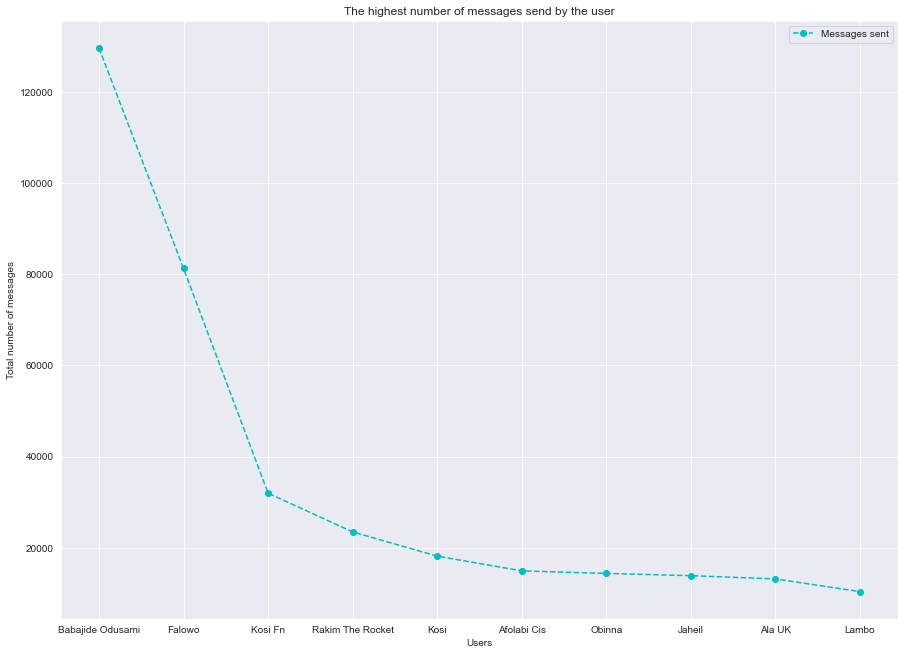

In [8]:
#  Using seaborn for Styles 
sns.set_style("darkgrid")

# Resize the  figure size
plt.figure(figsize=(15, 11))

# Here we are ploting the line chart using plt.plot 
plt.plot(whatsapp_df1.User[:10], whatsapp_df1.Number_of_messages[:10], 'o--c')  

# In here we are writing the Labels and Title for the plot chart
plt.xlabel('Users')
plt.ylabel('Total number of messages')

plt.title("The highest number of messages send by the user")
plt.legend(['Messages sent']);

sns.set_style("ticks", {"xtick.major.size": 8,"xtick.major":45 , "ytick.major.size": 8})

<AxesSubplot:title={'center':'Distribution of messages per user'}, xlabel='User', ylabel='Number_of_messages'>

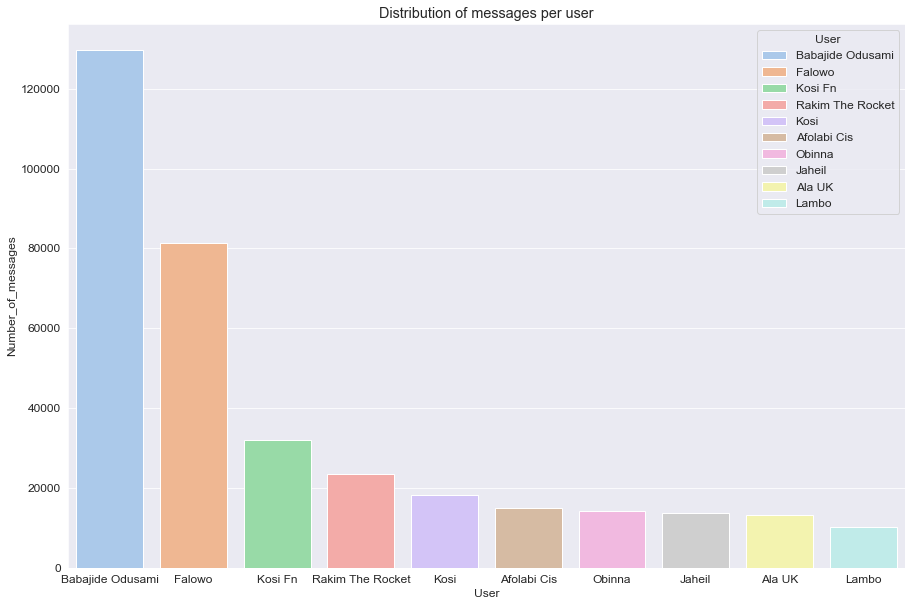

In [9]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (15, 10)

# Using the seaborn style 
sns.set_style("darkgrid")

plt.title('Distribution of messages per user');
sns.barplot(whatsapp_df1.User[:10], whatsapp_df1.Number_of_messages[:10],data = whatsapp_df1,hue=whatsapp_df1.User[:10], dodge=False,orient='v',palette="pastel")

# Question 2: Which emojis are used the most and  by which users?
Now we want to know which emoji is use widely by the user and from the analysis we can do an assumption that user will mostly likely to use emoji again in the other chat.
First we need to count the number of emoji in the mmessage row by using the UNICODE_EMOJI to search the code for the emoji

In [10]:
#Copy a dataset
whatsapp_df2 = whatsapp_df.copy()

#Count the number of emoji
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()),emoji.EMOJI_UNICODE['en'].values()) #UNICODE_EMOJI class have a thee emoji code inside



r = re.compile('|'.join(re.escape(p) for p in emojis_list))

for idx, row in whatsapp_df2.iterrows():
    emojis_found = r.findall(row["Message"]) #The findall() is a functions for regex that help to find a matches 
    for emoji_found in emojis_found:
        emoji_ctr[str(emoji_found)] += 1

In [11]:
whatsapp_df2.head(5)

User                                            Message  \
0   E.V.O  ‎Messages and calls are end-to-end encrypted. ...   
1  System                                  ‎Kaycee was added   
2  Kaycee            Throw the wife and brother into the bin   
3  System                                  ‎Ala UK was added   
4  System                                    ‎Oyin was added   

            Date_Time  
0 2019-07-05 16:38:20  
1 2019-07-05 16:38:20  
2 2019-07-05 16:38:16  
3 2019-07-05 16:38:20  
4 2019-07-05 16:38:20

As you can see when already rendered the emoji from the whatsapp_df3 and also successfully put in the dataframe table.Now all we need to do is just put in the Pie chart as our data visualization.

In [12]:
emojis_df = pd.DataFrame() #The reason to use pd.dataframe is we want to put the emojis_df into the dataframe tables
emojis_df['emoji'] = [''] * 15
emojis_df['number_of_Emoji'] = [0] * 15

i = 0

for item in emoji_ctr.most_common(15):
    emojis_df.emoji[i] = item[0]
    emojis_df.number_of_Emoji[i] = int(item[1])
  
    i += 1

emojis_df

emoji  number_of_Emoji
0      😂           113416
1      🤣            15932
2      😭             7717
3      💀             3462
4      🏽             1409
5      🥺             1088
6      ❤              940
7      👀              856
8      🏾              718
9      😅              687
10     🔥              603
11     💪              598
12     😍              571
13     😔              552
14     🥴              497

In [13]:
#This pei chart give us and ideas the overall view of which emoji use the most
fig = px.pie(emojis_df, values='number_of_Emoji', names='emoji',title='Emoji percentage used in chat group')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Question 4: Determine which word or text did the user use the most?
In here we are going to use a word cloud to visual representation of word in the chat and determine which word is widely use by the user? The reason behide this analysis is to understand the user behaviors. Why do we say so? Because if the word is repeating use we can say that the user will more likely to use the particular or text again in the other chat.

In [23]:
whatsapp_df3 = whatsapp_df.copy()

(-0.5, 499.5, 499.5, -0.5)

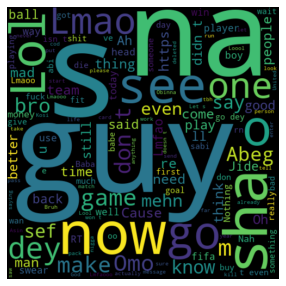

In [27]:
#Each of the word in the message will be review
word = " ".join(review for review in whatsapp_df3.Message)

stopwords = set(STOPWORDS)

#delete the word/text that are commonly used(eg.the,yes,no,bye,or and is)
stopwords.update(["the","is","yea","ok","okay","or","bye","no","will","yeah","I","almost","if","me","you","done","want","Ya"])

#Creating a word cloud 
wordcloud = WordCloud(width = 500, height =500 ,stopwords=stopwords, background_color="black",min_font_size = 10).generate(word)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Data Visualization:
As you can see the the word used the most is 'guy'. 

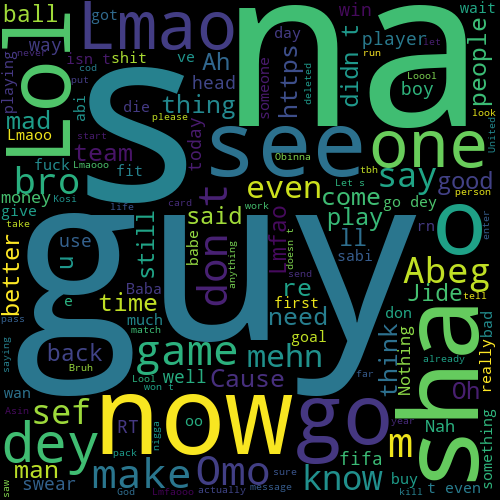

In [29]:
wordcloud.to_image()

# Question 3:The Most active hour in WhatsApp Groupchat
In this analysis it help us to understand what is the hours where all the member are very active in whatsapp. We will depend on two variable on is the number of messages and the hours. Then we will able to know when is the most active hours.

In [30]:
#Copy a dataframe
whatsapp_df4 = whatsapp_df.copy()

whatsapp_df4['number_of_message'] = [1] * whatsapp_df4.shape[0]

whatsapp_df4['hours'] = whatsapp_df4['Date_Time'].apply(lambda x: x.hour)

time_df = whatsapp_df4.groupby('hours').count().reset_index().sort_values(by = 'hours')


time_df

hours   User  Message  Date_Time  number_of_message
0       0  18213    18213      18213              18213
1       1  13463    13463      13463              13463
2       2  11197    11197      11197              11197
3       3   8884     8884       8884               8884
4       4   5312     5312       5312               5312
5       5   3466     3466       3466               3466
6       6   2668     2668       2668               2668
7       7   3646     3646       3646               3646
8       8   4985     4985       4985               4985
9       9   8285     8285       8285               8285
10     10  10779    10779      10779              10779
11     11  16748    16748      16748              16748
12     12  25761    25761      25761              25761
13     13  29363    29363      29363              29363
14     14  33455    33455      33455              33455
15     15  29131    29131      29131              29131
16     16  26518    26518      26518              26518
17     17  25785    25785      25785              25785
18     18  30496    30496      30496              30496
19     19  30078    30078      30078              30078
20     20  32799    32799      32799              32799
21     21  35317    35317      35317              35317
22     22  30550    30550      30550              30550
23     23  25569    25569      25569              25569

In this results we are able to know the most active time in whatsapp chat group is 2100hrs that is 9pm. The reason behide it is because during that time the group members are back from work.

<AxesSubplot:title={'center':'Most active hour in whatsapps'}, xlabel='hours', ylabel='number_of_message'>

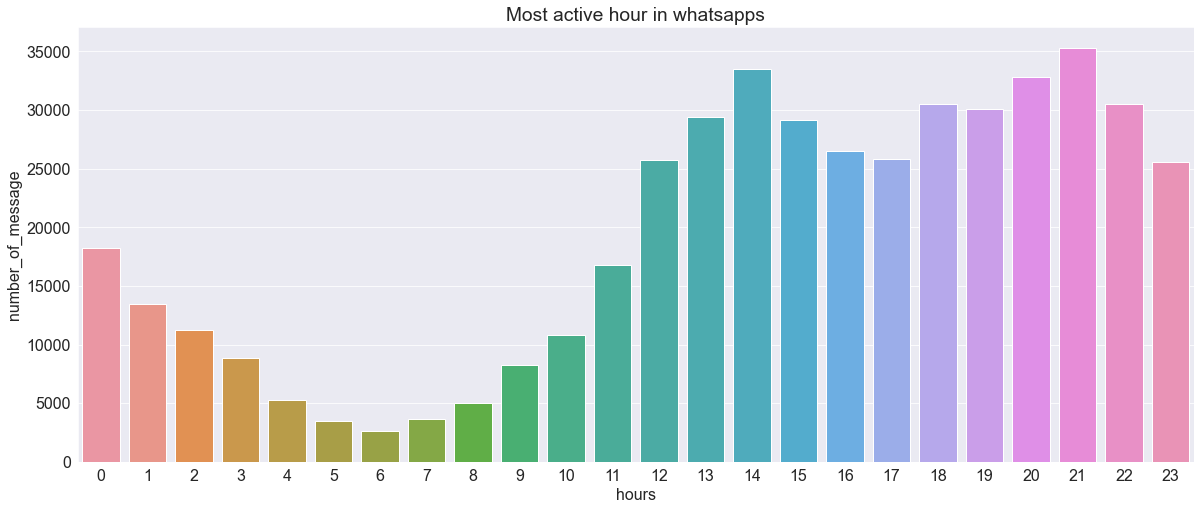

In [31]:
#Create the formatting of the graph 
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (20, 8)


# Using the seaborn style 
sns.set_style("darkgrid")

plt.title('Most active hour in whatsapps');
sns.barplot(time_df.hours,time_df.number_of_message,data = time_df,dodge=False)

# Question 5: Which month have the highest messages and also the busiest month?
This group was has existed between (07/05/2019 - 14/06/2021).

In [32]:
whatsapp_df5 = whatsapp_df.copy()
whatsapp_df5['Number_of_messages'] = [1] * whatsapp_df5.shape[0]

whatsapp_df5['month'] = whatsapp_df5['Date_Time'].apply(lambda x: x.month)  

df_month = whatsapp_df5.groupby('month')['Number_of_messages'].count().sort_values(ascending = False).reset_index()
df_month.head()

month  Number_of_messages
0      5               55424
1      7               43950
2      8               41930
3      6               39983
4     10               39817

Text(0.5, 1.0, 'Month that have the highest messages and the busiest month?')

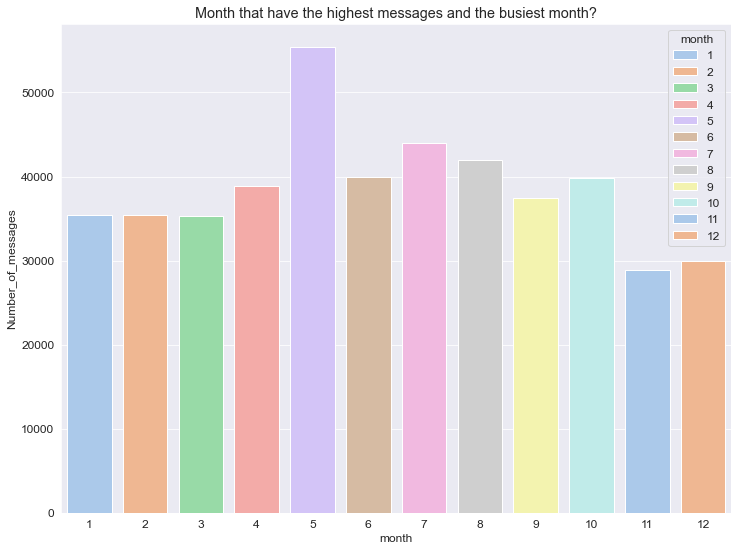

In [33]:
#Formating
sns.set_style("darkgrid")

#The background of the chart
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

#Creating a bar chart
sns.barplot(x=df_month.month,y=df_month.Number_of_messages ,hue='month',data=df_month,dodge=False,palette="pastel")
plt.title("Month that have the highest messages and the busiest month?")